# Objective :-
*  To Predict where the patient have Diabetes or not 

# Step 1: Import in Important libraries & read the Dataset

In [1]:
import os
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv(r'D:\Data Analytics Notes\IMS Material\Python Files\diabetes.csv')
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Step 2: Understanding the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Step 3: Treatment of Mising Values

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


On these columns, a value of zero does not make sense and thus indicates missing value.Following columns or variables have an invalid zero value-
Glucose,BloodPressure,SkinThickness,Insulin & BMI.

##### It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [7]:
df_new = df.copy()
df_new[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_new[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [8]:
df_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

To fill these Nan values the data distribution needs to be understood

# Step 4: Check the distribution of the data

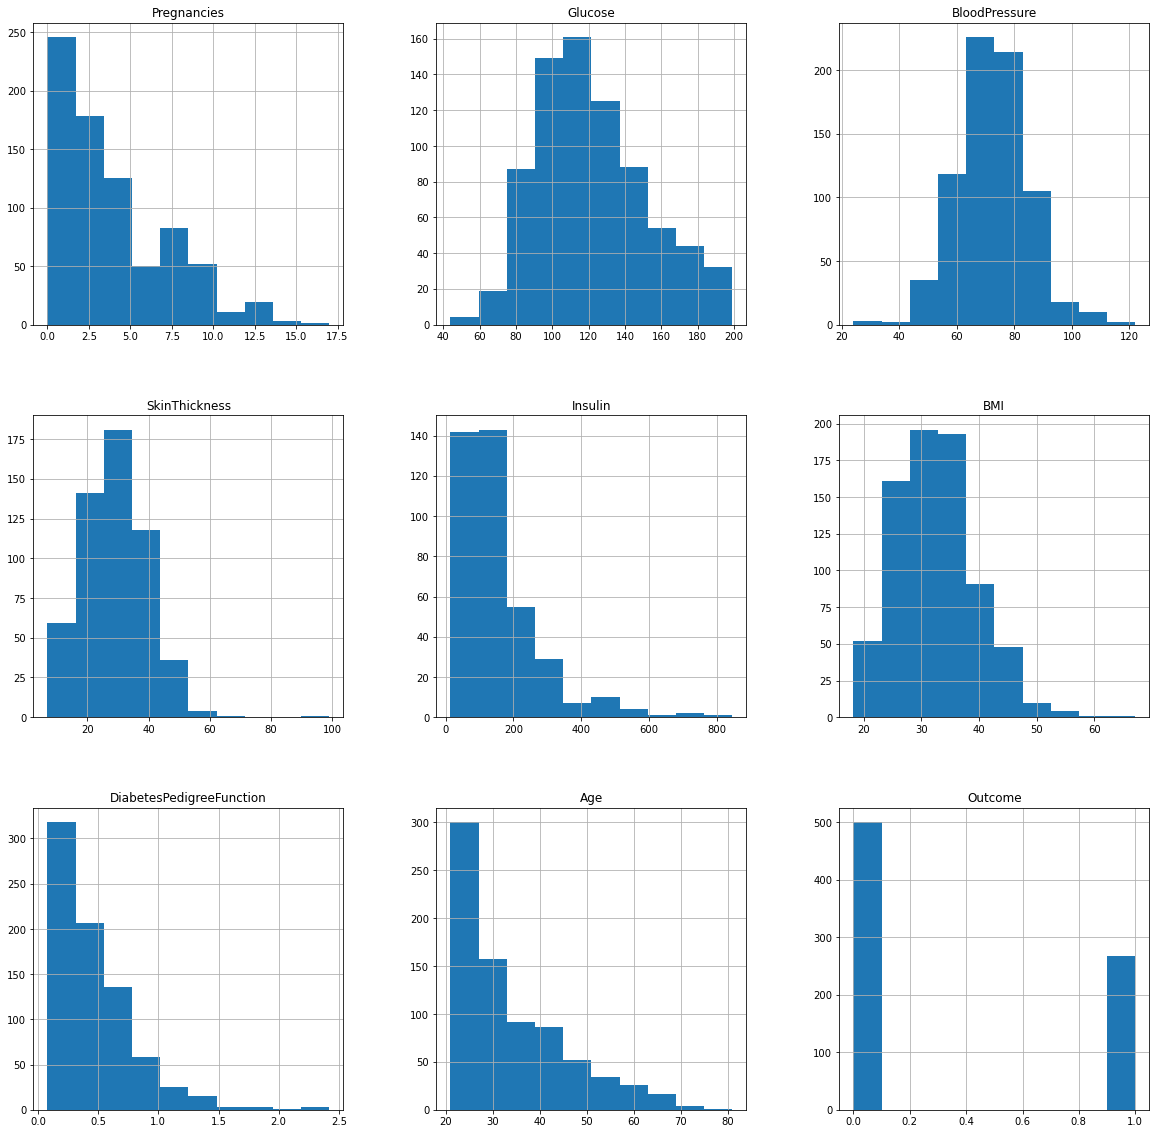

In [9]:
fig = df_new.hist(figsize = (20,20))

In [10]:
df_new['Glucose'].fillna(df_new['Glucose'].mean(), inplace = True)

In [11]:
df_new['BloodPressure'].fillna(df_new['BloodPressure'].mean(), inplace = True)
df_new['SkinThickness'].fillna(df_new['SkinThickness'].median(), inplace = True)
df_new['Insulin'].fillna(df_new['Insulin'].median(), inplace = True)
df_new['BMI'].fillna(df_new['BMI'].median(), inplace = True)

In [12]:
df_new.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Step 5: Treatment of Outliers

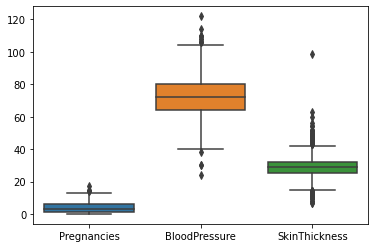

In [13]:
sns.boxplot(data=df_new.loc[:, ['Pregnancies','BloodPressure','SkinThickness']])
plt.show()

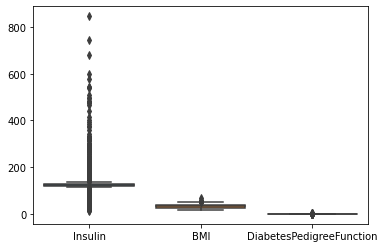

In [14]:
sns.boxplot(data=df_new.loc[:, ['Insulin','BMI','DiabetesPedigreeFunction']])
plt.show()

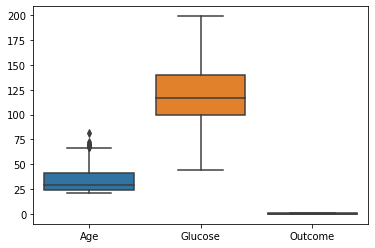

In [15]:
sns.boxplot(data=df_new.loc[:, ['Age','Glucose','Outcome']])
plt.show()

* Pregancies

In [16]:
q1 = df_new['Pregnancies'].quantile(0.25)
q3 = df_new['Pregnancies'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
Lower_limit,upper_limit

(-6.5, 13.5)

In [17]:
df_new['Pregnancies']=np.where(df_new['Pregnancies'] > upper_limit,upper_limit,df_new['Pregnancies']) 
# upper limit

* Blood Pressure

In [18]:
q1 = df_new['BloodPressure'].quantile(0.25)
q3 = df_new['BloodPressure'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
Lower_limit,upper_limit

(40.0, 104.0)

In [19]:
df_new['BloodPressure']=np.where(df_new['BloodPressure'] > upper_limit,upper_limit,df_new['BloodPressure'])
df_new['BloodPressure']=np.where(df_new['BloodPressure'] < Lower_limit,Lower_limit,df_new['BloodPressure'])

* SkinThickness

In [20]:
q1 = df_new['SkinThickness'].quantile(0.25)
q3 = df_new['SkinThickness'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
Lower_limit,upper_limit

(14.5, 42.5)

In [21]:
df_new['SkinThickness']=np.where(df_new['SkinThickness'] > upper_limit,upper_limit,df_new['SkinThickness'])

In [22]:
df_new['SkinThickness']=np.where(df_new['SkinThickness'] < Lower_limit,Lower_limit,df_new['SkinThickness'])

* Insulin

In [23]:
q1 = df_new['Insulin'].quantile(0.25)
q3 = df_new['Insulin'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
Lower_limit,upper_limit

(112.875, 135.875)

In [24]:
df_new['Insulin']=np.where(df_new['Insulin'] > upper_limit,upper_limit,df_new['Insulin'])

In [25]:
df_new['Insulin']=np.where(df_new['Insulin'] < Lower_limit,Lower_limit,df_new['Insulin'])

* BMI

In [26]:
q1 = df_new['BMI'].quantile(0.25)
q3 = df_new['BMI'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
Lower_limit,upper_limit

(13.849999999999998, 50.25)

In [27]:
df_new['BMI']=np.where(df_new['BMI'] > upper_limit,upper_limit,df_new['BMI'])

* DiabetesPedigreeFunction

In [28]:
q1 = df_new['DiabetesPedigreeFunction'].quantile(0.25)
q3 = df_new['DiabetesPedigreeFunction'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
Lower_limit,upper_limit

(-0.32999999999999996, 1.2)

In [29]:
df_new['DiabetesPedigreeFunction']=np.where(df_new['DiabetesPedigreeFunction']
                                            > upper_limit,upper_limit,df_new['DiabetesPedigreeFunction'])

* Age

In [30]:
q1 = df_new['Age'].quantile(0.25)
q3 = df_new['Age'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
Lower_limit,upper_limit

(-1.5, 66.5)

In [31]:
df_new['Age']=np.where(df_new['Age'] > upper_limit,upper_limit,df_new['Age'])

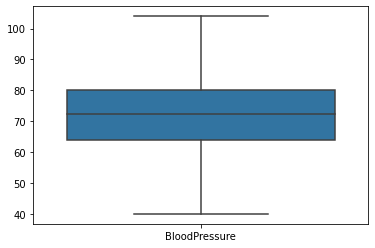

In [32]:
sns.boxplot(data=df_new.loc[:, ['BloodPressure']])
plt.show()

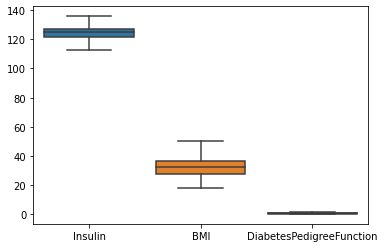

In [33]:
sns.boxplot(data=df_new.loc[:, ['Insulin','BMI','DiabetesPedigreeFunction']])
plt.show()

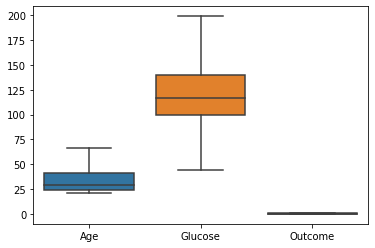

In [34]:
sns.boxplot(data=df_new.loc[:, ['Age','Glucose','Outcome']])
plt.show()

# Step 6: Splitting the Data

##  into Training Data & Testing

In [35]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = df_new.drop(['Outcome'],axis=1)
y = df_new['Outcome']

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y , test_size=0.3,random_state=20)

# Step 7: Model Building with K-NN Technique

In [36]:
# train the decision tree
## Instantiate the model with 5 neighbors. 
model = KNeighborsRegressor(n_neighbors=8)  


## Fit the model on the training data.
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

# Step 8: Model testing on Train Data

In [37]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
416,1.0,97.0,68.0,21.0,125.000,27.2,1.095,22.0,0
373,2.0,105.0,58.0,40.0,112.875,34.9,0.225,25.0,0
166,3.0,148.0,66.0,25.0,125.000,32.5,0.256,22.0,0
685,2.0,129.0,74.0,26.0,135.875,33.2,0.591,25.0,0
156,2.0,99.0,52.0,15.0,112.875,24.6,0.637,21.0,0


In [38]:
train['Predicted']=model.predict(X_train)
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Predicted
416,1.0,97.0,68.0,21.0,125.000,27.2,1.095,22.0,0,0.000
373,2.0,105.0,58.0,40.0,112.875,34.9,0.225,25.0,0,0.375
166,3.0,148.0,66.0,25.0,125.000,32.5,0.256,22.0,0,0.375
685,2.0,129.0,74.0,26.0,135.875,33.2,0.591,25.0,0,0.375
156,2.0,99.0,52.0,15.0,112.875,24.6,0.637,21.0,0,0.000


In [39]:
train['Predicted'] = np.where(train['Predicted']>0.7,1,0)
train.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Predicted
416,1.0,97.0,68.000000,21.0,125.000,27.2,1.095,22.0,0,0
373,2.0,105.0,58.000000,40.0,112.875,34.9,0.225,25.0,0,0
166,3.0,148.0,66.000000,25.0,125.000,32.5,0.256,22.0,0,0
685,2.0,129.0,74.000000,26.0,135.875,33.2,0.591,25.0,0,0
156,2.0,99.0,52.000000,15.0,112.875,24.6,0.637,21.0,0,0
204,6.0,103.0,72.000000,32.0,135.875,37.7,0.324,55.0,0,0
704,4.0,110.0,76.000000,20.0,112.875,28.4,0.118,27.0,0,0
613,6.0,105.0,80.000000,28.0,125.000,32.5,0.878,26.0,0,0
357,13.0,129.0,72.405184,30.0,125.000,39.9,0.569,44.0,1,0
621,2.0,92.0,76.000000,20.0,125.000,24.2,1.200,28.0,0,0


In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Outcome'],train['Predicted'])
print(confusion_matrix)

[[334  13]
 [101  89]]


In [41]:
Accuracy_Train=((334+89)/(537)*100)
print(Accuracy_Train)

78.77094972067039


# Step 9: Model testing on Test Data

In [42]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
143,10.0,108.0,66.0,29.0,125.000,32.4,0.272,42.0,1
14,5.0,166.0,72.0,19.0,135.875,25.8,0.587,51.0,1
504,3.0,96.0,78.0,39.0,125.000,37.3,0.238,40.0,0
557,8.0,110.0,76.0,29.0,125.000,27.8,0.237,58.0,0
736,0.0,126.0,86.0,27.0,120.000,27.4,0.515,21.0,0


In [43]:
test['Predicted']=model.predict(X_test)
test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Predicted
143,10.0,108.0,66.0,29.0,125.000,32.4,0.272,42.0,1,0.750
14,5.0,166.0,72.0,19.0,135.875,25.8,0.587,51.0,1,0.750
504,3.0,96.0,78.0,39.0,125.000,37.3,0.238,40.0,0,0.375
557,8.0,110.0,76.0,29.0,125.000,27.8,0.237,58.0,0,0.250
736,0.0,126.0,86.0,27.0,120.000,27.4,0.515,21.0,0,0.250


In [44]:
test['Predicted'] = np.where(test['Predicted']>0.7,1,0)
train.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Predicted
416,1.0,97.0,68.0,21.0,125.000,27.2,1.095,22.0,0,0
373,2.0,105.0,58.0,40.0,112.875,34.9,0.225,25.0,0,0
166,3.0,148.0,66.0,25.0,125.000,32.5,0.256,22.0,0,0
685,2.0,129.0,74.0,26.0,135.875,33.2,0.591,25.0,0,0
156,2.0,99.0,52.0,15.0,112.875,24.6,0.637,21.0,0,0


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Outcome'],test['Predicted'])
print(confusion_matrix)

[[144   9]
 [ 48  30]]


In [46]:
Accuracy_test=((144+30)/(231)*100)
print(Accuracy_Train)

78.77094972067039


# Step 10: To identify the best value of K

In [47]:
from sklearn.metrics import accuracy_score
for K in range(25):
    K_value = K+1
    model2 = KNeighborsClassifier(n_neighbors = K_value)
    model2.fit(X_train, y_train) 
    y_pred = model2.predict(X_test)
    print("Accuracy is ", 
          accuracy_score(y_test,y_pred)*100,"% for K-Value:",
          K_value)

Accuracy is  72.72727272727273 % for K-Value: 1
Accuracy is  71.86147186147186 % for K-Value: 2
Accuracy is  74.02597402597402 % for K-Value: 3
Accuracy is  75.32467532467533 % for K-Value: 4
Accuracy is  74.89177489177489 % for K-Value: 5
Accuracy is  77.48917748917748 % for K-Value: 6
Accuracy is  75.32467532467533 % for K-Value: 7
Accuracy is  78.35497835497836 % for K-Value: 8
Accuracy is  73.59307359307358 % for K-Value: 9
Accuracy is  75.75757575757575 % for K-Value: 10
Accuracy is  74.45887445887446 % for K-Value: 11
Accuracy is  75.32467532467533 % for K-Value: 12
Accuracy is  74.89177489177489 % for K-Value: 13
Accuracy is  76.19047619047619 % for K-Value: 14
Accuracy is  75.32467532467533 % for K-Value: 15
Accuracy is  76.19047619047619 % for K-Value: 16
Accuracy is  75.32467532467533 % for K-Value: 17
Accuracy is  75.75757575757575 % for K-Value: 18
Accuracy is  74.89177489177489 % for K-Value: 19
Accuracy is  75.75757575757575 % for K-Value: 20
Accuracy is  75.3246753246753